In [7]:
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
jtplot.style(theme='monokai')
%matplotlib inline

In [6]:
# Melihat list data set milik seaborn
sns.get_dataset_names()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [2]:
dfTips = sns.load_dataset('tips')
dfTips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
dfTips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


# Distribution plot

## Distplot

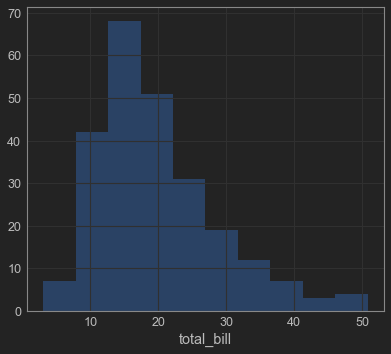

In [14]:
sns.distplot(dfTips['total_bill'], bins=10, kde=False)

## Jointplot

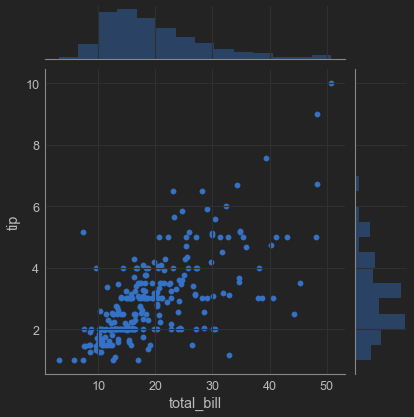

In [19]:
# Hubungan antara 2 numerical data
# Hubungan antara total_bill dengan tip
sns.jointplot(x='total_bill', y='tip', data=dfTips)

> **kind = hex**

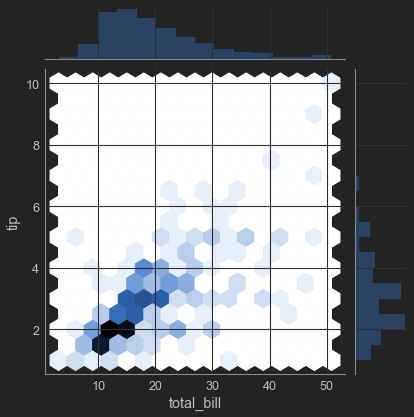

In [20]:
sns.jointplot(x='total_bill', y='tip', data=dfTips, kind='hex')

> **kind = kde**

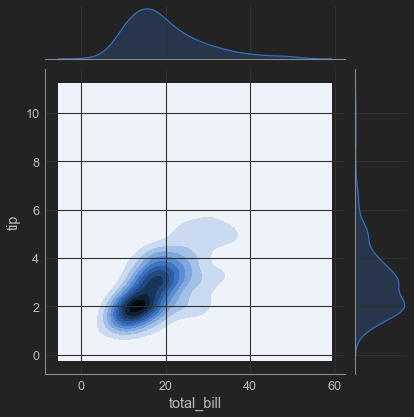

In [21]:
sns.jointplot(x='total_bill', y='tip', data=dfTips, kind='kde')

> **kind = reg**

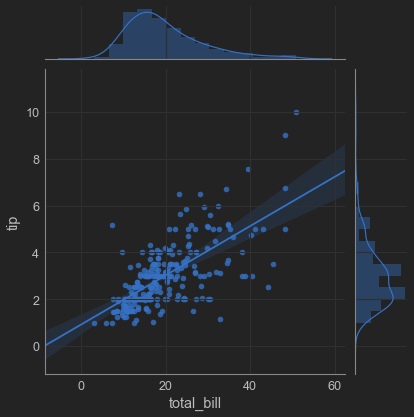

In [22]:
# regression
sns.jointplot(x='total_bill', y='tip', data=dfTips, kind='reg')

## Pairplot

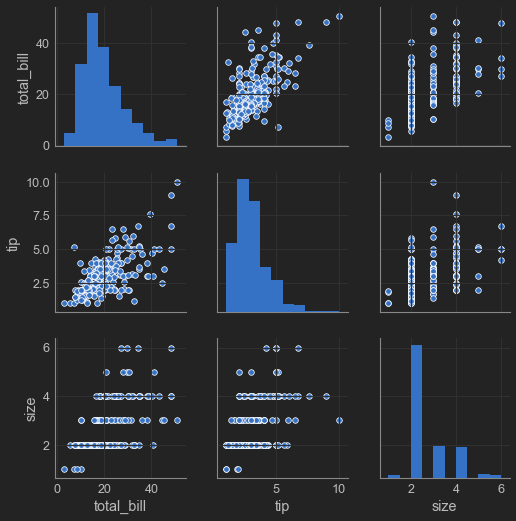

In [25]:
# Hubungan antar numerical
# Untu kolom yang sama, nilai sumbu y tidak berlaku.
# Ini hanya menunjukkan banyaknya julah data
sns.pairplot(dfTips)

> **hue = sex**

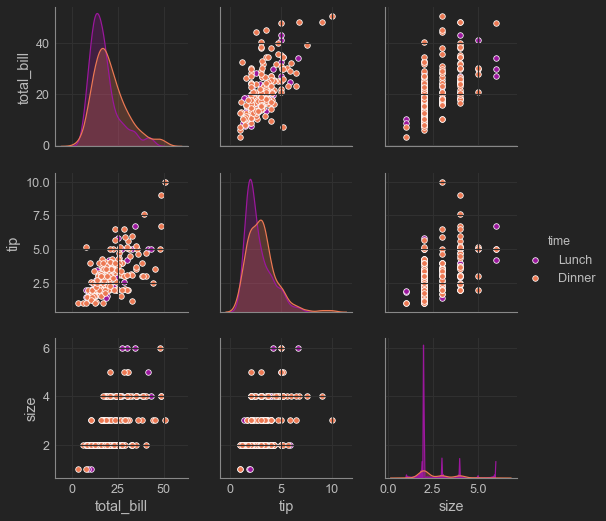

In [37]:
# hue : categorical data
sns.pairplot(dfTips, hue='time', palette='plasma')

## Rugplot

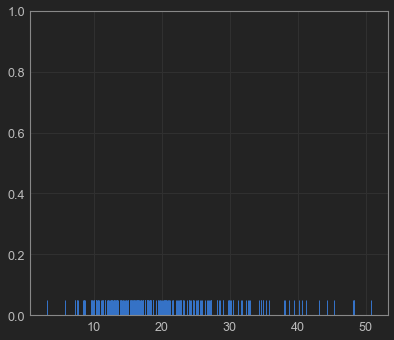

In [38]:
sns.rugplot(dfTips['total_bill'])

# Categorical Plot

In [13]:
import numpy as np

In [11]:
dfTips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Barplot

In [17]:
resMean = dfTips.groupby('sex').mean()
resMean

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


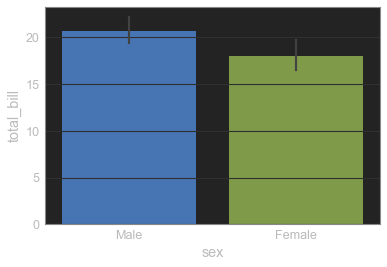

In [15]:
# x = categorical , y = numerical
# estimator : np.mean (default)

# Rata - rata bill untuk setiap gender
sns.barplot(x='sex' , y='total_bill', data=dfTips, estimator=np.mean)

# rata trx yang dilakukan pria sekitar 20 dollar
# rata trx yang dilakukan wanita sekitar 18 dollar

In [18]:
resMax = dfTips.groupby('sex').max()
resMax

,total_bill,tip,size
sex,,,
Male,50.81,10.0,6
Female,44.30,6.5,6


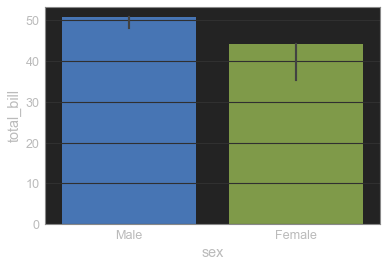

In [22]:
# bill tertinggi untuk setiap gender
sns.barplot(x='sex', y='total_bill', data=dfTips, estimator=np.max)

In [24]:
dfTips.groupby('day').max()

,total_bill,tip,size
day,,,
Thur,43.11,6.70,6
Fri,40.17,4.73,4
Sat,50.81,10.00,5
Sun,48.17,6.50,6


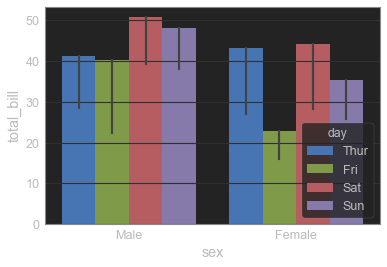

In [23]:
# bill tertinggi untuk setiap gender per harinya
sns.barplot(x='sex', y='total_bill', hue='day', data=dfTips, estimator=np.max)

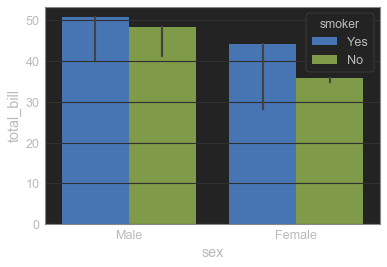

In [26]:
# bill tertinggi untuk setiap gender yang merokok dan tidak merokok
sns.barplot(x='sex', y='total_bill', hue='smoker', data=dfTips, estimator=np.max)

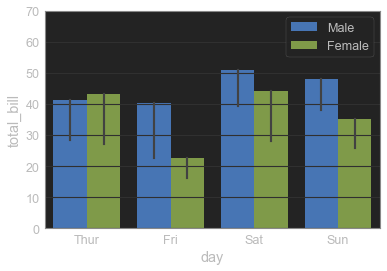

In [55]:
# bill tertinggi per harinya untuk setiap gender
ax = sns.barplot(x='day', y='total_bill', hue='sex', data=dfTips, estimator=np.max)
ax.set_ylim([0,70])
ax.legend(loc='best')

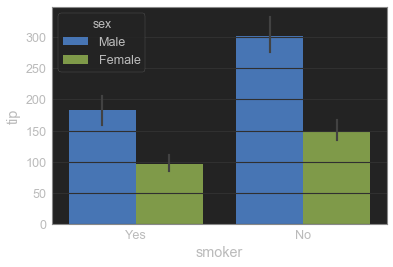

In [47]:
# total tip antara perokok dan tidak setiap gendernya
sns.barplot(x='smoker', y='tip', hue='sex' ,data=dfTips, estimator=np.sum)

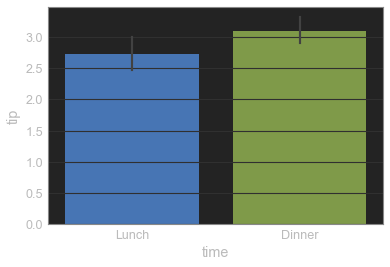

In [49]:
# rata - rata tip yang berdasarkan time
sns.barplot(x='time', y='tip', data=dfTips, estimator=np.mean)

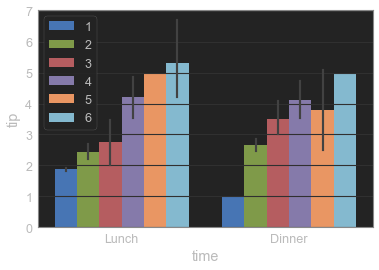

In [53]:
# rata - rata tip yang berdasarkan time untuk setiap size nya
ax = sns.barplot(x='time', y='tip', hue='size' ,data=dfTips, estimator=np.mean)
ax.legend(loc='best')

## Count plot

In [65]:
male = sum(dfTips['sex'] == 'Male')
female = sum(dfTips['sex'] == 'Female')

print(f'Jumlah Pria : {male}')
print(f'Jumlah Wanita : {female}')

Jumlah Pria : 157
Jumlah Wanita : 87


In [66]:
dfTips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

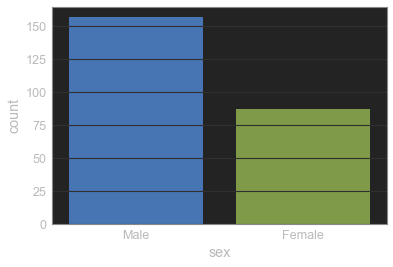

In [56]:
# Banyaknya Pria dan Wanita
sns.countplot(x='sex', data=dfTips)

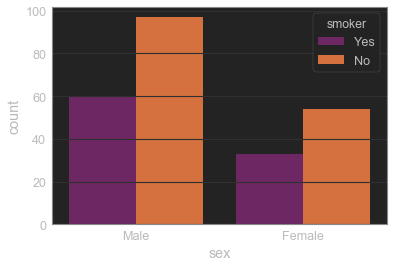

In [69]:
# Banyaknya Pria dan Wanita berdasarkan status perokok
sns.countplot(x='sex', hue='smoker', data=dfTips, palette='inferno')

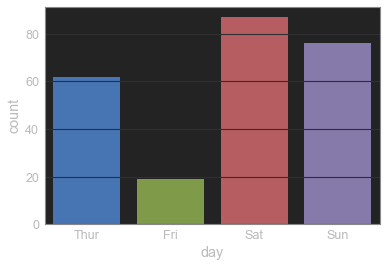

In [71]:
# Banyaknya transaksi per hari
sns.countplot(x='day', data=dfTips)

In [77]:
dfTips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

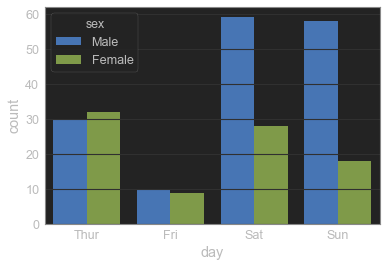

In [75]:
# Banyaknya transaksi setiap gender perhari
sns.countplot(x='day', hue='sex', data=dfTips)

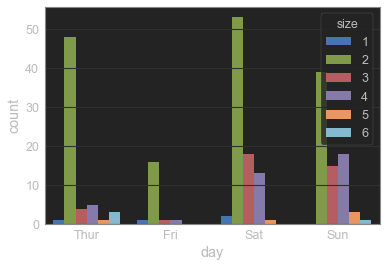

In [76]:
# Banyaknya transaksi setiap setiap hari per size nya
sns.countplot(x='day', hue='size', data=dfTips)

## Boxplot

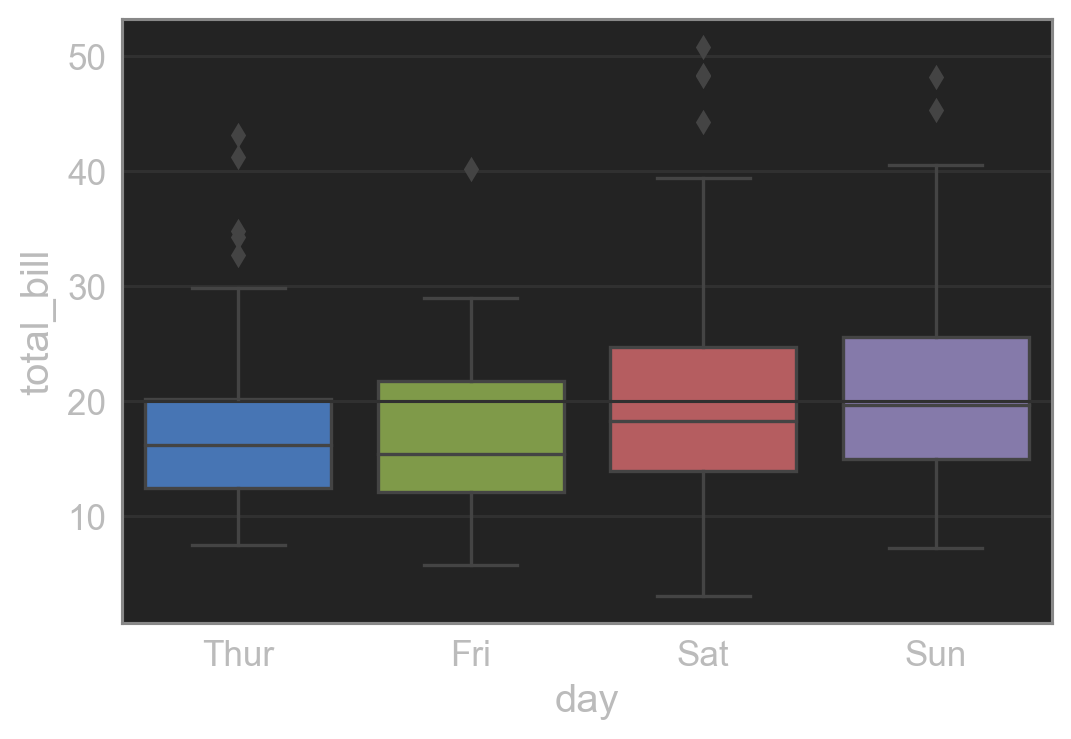

In [10]:
fig, ax = plt.subplots(dpi=200)
sns.boxplot(x='day', y='total_bill', data=dfTips)
plt.show()

In [11]:
dfTips[dfTips['day'] == 'Sat'].describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,20.441379,2.993103,2.517241
std,9.480419,1.631014,0.819275
min,3.070000,1.000000,1.000000
25%,13.905000,2.000000,2.000000
50%,18.240000,2.750000,2.000000
75%,24.740000,3.370000,3.000000
max,50.810000,10.000000,5.000000
